# Advent of Code 2022 - Day 14

In [1]:
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
# Read data
with open('input.txt', 'r') as f:
    data = f.read().strip().split('\n')

In [3]:
data[:2]

['495,144 -> 499,144',
 '492,40 -> 492,43 -> 484,43 -> 484,50 -> 499,50 -> 499,43 -> 496,43 -> 496,40']

In [4]:
# Parse the input (which is a list of rock positions) and save the rock positions
obst = set()
for line in data:
    line = line.split('->')
    for i in range(len(line)-1):
        # Find start and end point of line of rock
        x1, y1 = [int(j) for j in line[i].split(',')]
        x2, y2 = [int(j) for j in line[i+1].split(',')]
    
        x_min, x_max = sorted([x1,x2])
        y_min, y_max = sorted([y1,y2])
    
        if x_min == x_max:
            # Column of rock at constant x
            obst.update(set([(x_min,j) for j in range(y_min, y_max+1)]))
        if y_min == y_max:
            # Row of rock at constant y
            obst.update(set([(j,y_min) for j in range(x_min, x_max+1)]))

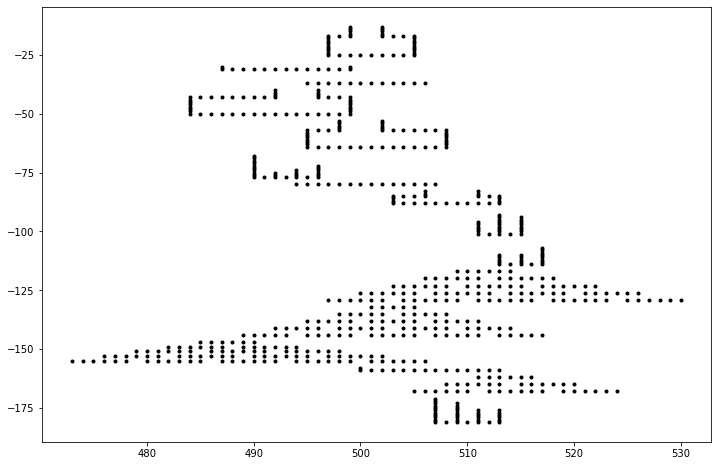

In [5]:
# Save rock positions and plot them
rocks = deepcopy(obst)
plt.figure(figsize=(12,8))
for i in rocks:
    plt.plot(i[0], -i[1], 'k.')


In [6]:
# Assuming y-axis points downwards, x-axis points to the right
def simulate(coords_taken, y_max, x, y, part_1_finished=False):
    """
    Simulates the falling sand.
    coords_taken = coordinates at which either a rock or a unit of sand at rest lies
    y_max = y-coordinate of the lowest rocks (which is at highest y)
    x,y = source of the falling sand
    part_1_finished = flag stating part 1 result has been obtained and thus shouldn't keep printing
    """
    num_rocks = len(coords_taken) # Number of rocks
    sand_path = [(500,0)] # Path taken by sand
    while True: # Keep looping until sand falls into void (return statement exits this loop)
        while True: # Keep looping until current bit of sand comes to rest
            if (x,y+1) not in coords_taken:
                # Sand moves down
                y += 1
            elif (x-1,y+1) not in coords_taken:
                # Sand moves diagonally left
                x -= 1
                y += 1
            elif (x+1,y+1) not in coords_taken:
                # Sand moves diagonally right
                x += 1
                y += 1
            else:
                # Sand comes to rest
                if y == y_max + 1 and not part_1_finished: # Part 1
                    # Sand has reached the void so print out number of units of sand and return
                    print("Part 1:", len(coords_taken) - num_rocks)
                    part_1_finished = True # Don't return, continue simulation until part 2 is finished
                    
                # Add sand to list of coords_taken
                coords_taken.add((x,y))
                
                if (x,y) == (500,0): # Part 2
                    # Sand has reached the source
                    print("Part 2:", len(coords_taken) - num_rocks)
                    return

                while True: # Retrace path of sand
                    # Second last position of sand will be the starting point for the next bit of sand
                    if sand_path[-1] not in coords_taken:
                        # Change starting coordinates
                        x,y = sand_path[-1]
                        break
                    sand_path.pop()
                # Move to next bit of sand
                break
            # Add location of falling sand at this point in time to the path
            sand_path.append((x,y))            

In [7]:
x,y = 500,0 # Starting position of sand
y_max = max(y for x,y in obst) # Lowest (highest y) rocks

# Add infinite floor (used in Part 2)
obst.update(set((i, y_max+2) for i in range(490-y_max,510+y_max)))

simulate(obst, y_max, x, y)

Part 1: 638
Part 2: 31722


In [8]:
# Obtain only the sand positions
sand = obst - rocks

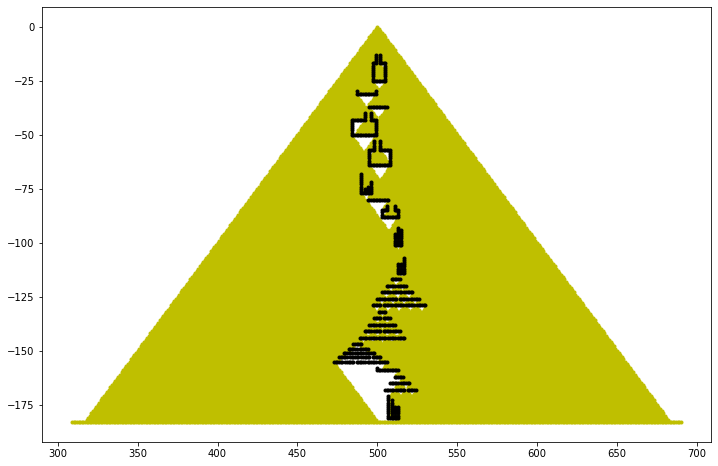

In [9]:
# Plot the sand and rock
plt.figure(figsize=(12,8))
for i in sand:
    plt.plot(i[0], -i[1], 'y.')
for i in rocks:
    plt.plot(i[0], -i[1], 'k.')

    